## To run use TSP(YourAdjacencyListHere)

In [1]:
import networkx as nx
import itertools
from networkx.algorithms import approximation as approx
import math
import numpy as np
import csv

# gets number of edges to create list of edges
def numberOfEdges(adjList, rows, cols):
    edgeCounter = 0
    for i in range(0, rows):
        for j in range(0, cols):
            if adjList[i][j] == 1 and i < j:
                edgeCounter = edgeCounter + 1
    
    return edgeCounter
                
# creates list of edges and adds weights to each
def createEdgeList(adjList, edgeList, edgeUpdates, edgeCounter, rows, cols):
    entries = 0
    for i in range(0, rows):
        for j in range(0, cols):
            if adjList[i][j] == 1 and i < j:
                edgeUpdates[i,j] = {'weight': 1}
                edgeList[entries][1] = j
                edgeList[entries][0] = i
                entries += 1
            elif adjList[i][j] == 0 and i < j:
                edgeUpdates[i,j] = {'weight': 99999}

# runs the greedy TSP algorithm on the adjacency matrix
def TSP(adjList):
    rows, cols = (len(adjList), len(adjList[0]))
    edgeUpdates = {}
    edgeCounter = numberOfEdges(adjList, rows, cols)
    edgeList = [[0 for i in range(2)] for j in range(edgeCounter)]
    
    createEdgeList(adjList, edgeList, edgeUpdates, edgeCounter, rows, cols)
    
    cube = nx.Graph(incoming_graph_data=edgeList)
    nx.set_edge_attributes(cube, edgeUpdates)
    nx.draw(cube, with_labels = True)
    completeGraph = nx.complete_graph(rows, cube)
    nx.set_edge_attributes(completeGraph, edgeUpdates)
    
    init_cycle = [i for i in range(rows)]
    init_cycle.append(0)  
    
    path = approx.greedy_tsp(completeGraph, weight='weight')
    print("Greedy TSP", path[0:len(path)-1])
    
    path = approx.christofides(completeGraph, weight='weight')
    print("Christofides TSP", path[0:len(path)-1])
    
    path = approx.simulated_annealing_tsp(completeGraph, init_cycle, weight='weight')
    print("Simulated Annealing TSP", path[0:len(path)-1])
    
    path = approx.threshold_accepting_tsp(completeGraph, init_cycle, weight='weight')
    print("Threshold Accepting TSP", path[0:len(path)-1])


Greedy TSP [0, 1, 2, 3, 7, 4, 5, 6]
Christofides TSP [0, 4, 7, 3, 1, 5, 6, 2]
Simulated Annealing TSP [0, 1, 5, 4, 7, 6, 2, 3]
Threshold Accepting TSP [0, 1, 2, 3, 7, 6, 5, 4]


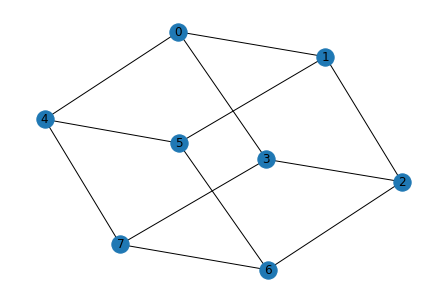

In [2]:
cubeAdjList = [[0,1,0,1,1,0,0,0],
              [1,0,1,0,0,1,0,0],
              [0,1,0,1,0,0,1,0],
              [1,0,1,0,0,0,0,1],
              [1,0,0,0,0,1,0,1],
              [0,1,0,0,1,0,1,0],
              [0,0,1,0,0,1,0,1],
              [0,0,0,1,1,0,1,0]]
TSP(cubeAdjList)

Greedy TSP [0, 1, 2, 3]
Christofides TSP [0, 3, 2, 1]
Simulated Annealing TSP [0, 1, 2, 3]
Threshold Accepting TSP [0, 1, 2, 3]


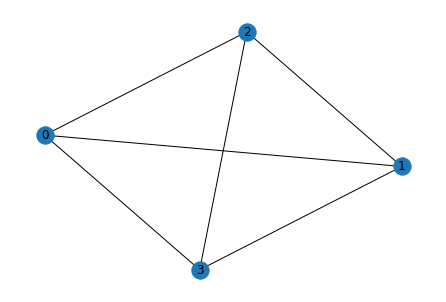

In [3]:
tetrahedron = [[0,1,1,1],
              [1,0,1,1],
              [1,1,0,1],
              [1,1,1,0]]
TSP(tetrahedron)